In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
file_path=(r"/content/Sales and Marketing Call Center.csv")
df=pd.read_csv(file_path)

In [ ]:
df.head()

,Call_ID,Date,Agent_First_Name,Agent_Last_Name,Agent_Rating,Product_Discussed,Call_Duration_Minutes,Call_Outcome,Customer_Age,Callers_Name,Customer_Gender,State,Customer_Income_Bracket,Time_of_Day,Follow_Up_Call_Required,Repeat_Customer,Reason_Call_Abandoned
0,el-Pa,45359,Michael,Page,5.0,Loans,10.00,Success,25.0,Noah Smith,Male,New York,High,Afternoon,Yes,No,NaN
1,ah-Ha,45484,Elijah,Hawkins,4.9,Internet Package,26.22,Failure,20.0,Brian Anderson,Male,California,High,Morning,No,Yes,Technical Issues
2,ia-Ly,45396,Olivia,Lyons,5.0,Loans,10.00,Success,40.0,Loretta Williams,Female,Alabama,Low,Morning,No,No,NaN
3,ew-Cl,45635,Drew,Clay,4.4,Loans,2.00,Failure,20.0,Casey Reyes,Male,New York,High,Morning,No,No,Technical Issues
4,va-Sa,45613,Ava,Sandoval,5.0,Loans,2.00,Failure,35.0,Craig Mosley,Male,North Carolina,Low,Afternoon,Yes,Yes,Technical Issues


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54732 entries, 0 to 54731
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call_ID                  54732 non-null  object 
 1   Date                     54732 non-null  int64  
 2   Agent_First_Name         54732 non-null  object 
 3   Agent_Last_Name          54732 non-null  object 
 4   Agent_Rating             42457 non-null  float64
 5   Product_Discussed        42457 non-null  object 
 6   Call_Duration_Minutes    42457 non-null  float64
 7   Call_Outcome             54732 non-null  object 
 8   Customer_Age             54731 non-null  float64
 9   Callers_Name             54731 non-null  object 
 10  Customer_Gender          54731 non-null  object 
 11  State                    54731 non-null  object 
 12  Customer_Income_Bracket  54731 non-null  object 
 13  Time_of_Day              54731 non-null  object 
 14  Follow_Up_Call_Require

In [ ]:
df.describe()

,Date,Agent_Rating,Call_Duration_Minutes,Customer_Age
count,200000.000000,155356.000000,155356.000000,200000.000000
mean,45474.407020,4.254643,16.910975,26.316825
std,105.667972,0.923115,12.634362,10.467033
min,45292.000000,0.000000,2.000000,14.000000
25%,45383.000000,4.000000,6.600000,16.000000
50%,45475.000000,4.600000,12.240000,25.000000
75%,45566.000000,4.800000,26.200000,35.000000
max,45657.000000,5.000000,45.000000,69.000000


In [ ]:
df.isnull().sum()

,0
Call_ID,0
Date,0
Agent_First_Name,0
Agent_Last_Name,0
Agent_Rating,44644
Product_Discussed,44644
Call_Duration_Minutes,44644
Call_Outcome,0
Customer_Age,0
Callers_Name,0


# Data Cleaning

# 1. Who are the top-performing agents based on Agent Ratings?

In [ ]:
df.head(2)

,Call_ID,Date,Agent_First_Name,Agent_Last_Name,Agent_Rating,Product_Discussed,Call_Duration_Minutes,Call_Outcome,Customer_Age,Callers_Name,Customer_Gender,State,Customer_Income_Bracket,Time_of_Day,Follow_Up_Call_Required,Repeat_Customer,Reason_Call_Abandoned
0,el-Pa,45359,Michael,Page,5.0,Loans,10.00,Success,25,Noah Smith,Male,New York,High,Afternoon,Yes,No,NaN
1,ah-Ha,45484,Elijah,Hawkins,4.9,Internet Package,26.22,Failure,20,Brian Anderson,Male,California,High,Morning,No,Yes,Technical Issues


In [ ]:
# Concating the first name and last name of agents

df['Agent Full Name']=df['Agent_First_Name']+' '+df['Agent_Last_Name']
df.head()

,Call_ID,Date,Agent_First_Name,Agent_Last_Name,Agent_Rating,Product_Discussed,Call_Duration_Minutes,Call_Outcome,Customer_Age,Callers_Name,Customer_Gender,State,Customer_Income_Bracket,Time_of_Day,Follow_Up_Call_Required,Repeat_Customer,Reason_Call_Abandoned,Agent Full Name
0,el-Pa,45359,Michael,Page,5.0,Loans,10.00,Success,25.0,Noah Smith,Male,New York,High,Afternoon,Yes,No,NaN,Michael Page
1,ah-Ha,45484,Elijah,Hawkins,4.9,Internet Package,26.22,Failure,20.0,Brian Anderson,Male,California,High,Morning,No,Yes,Technical Issues,Elijah Hawkins
2,ia-Ly,45396,Olivia,Lyons,5.0,Loans,10.00,Success,40.0,Loretta Williams,Female,Alabama,Low,Morning,No,No,NaN,Olivia Lyons
3,ew-Cl,45635,Drew,Clay,4.4,Loans,2.00,Failure,20.0,Casey Reyes,Male,New York,High,Morning,No,No,Technical Issues,Drew Clay
4,va-Sa,45613,Ava,Sandoval,5.0,Loans,2.00,Failure,35.0,Craig Mosley,Male,North Carolina,Low,Afternoon,Yes,Yes,Technical Issues,Ava Sandoval


In [ ]:
# Changing Agent_Rating values as numperic

df['Agent_Rating']=pd.to_numeric(df['Agent_Rating'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54732 entries, 0 to 54731
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call_ID                  54732 non-null  object 
 1   Date                     54732 non-null  int64  
 2   Agent_First_Name         54732 non-null  object 
 3   Agent_Last_Name          54732 non-null  object 
 4   Agent_Rating             42457 non-null  float64
 5   Product_Discussed        42457 non-null  object 
 6   Call_Duration_Minutes    42457 non-null  float64
 7   Call_Outcome             54732 non-null  object 
 8   Customer_Age             54731 non-null  float64
 9   Callers_Name             54731 non-null  object 
 10  Customer_Gender          54731 non-null  object 
 11  State                    54731 non-null  object 
 12  Customer_Income_Bracket  54731 non-null  object 
 13  Time_of_Day              54731 non-null  object 
 14  Follow_Up_Call_Require

In [ ]:
df[df['Agent_Rating'].isnull()]

,Call_ID,Date,Agent_First_Name,Agent_Last_Name,Agent_Rating,Product_Discussed,Call_Duration_Minutes,Call_Outcome,Customer_Age,Callers_Name,Customer_Gender,State,Customer_Income_Bracket,Time_of_Day,Follow_Up_Call_Required,Repeat_Customer,Reason_Call_Abandoned,Agent Full Name
5,va-Sa,45635,Ava,Sandoval,NaN,NaN,NaN,Abandoned,20,Brandon Kelley,Male,Ohio,High,Afternoon,No,No,long Wait Time,Ava Sandoval
9,va-Sa,45338,Ava,Sandoval,NaN,NaN,NaN,Abandoned,69,Christopher Larson,Female,North Carolina,Middle,Afternoon,No,Yes,long Wait Time,Ava Sandoval
12,ia-De,45407,Sophia,Delacruz,NaN,NaN,NaN,Abandoned,43,Victoria Hayes,Female,Texas,Low,Evening,No,Yes,long Wait Time,Sophia Delacruz
13,ah-Ha,45463,Elijah,Hawkins,NaN,NaN,NaN,Abandoned,33,Robert Campos,Male,North Carolina,High,Morning,No,No,long Wait Time,Elijah Hawkins
20,ay-Ma,45348,Ray,Mason,NaN,NaN,NaN,Abandoned,26,Laura Henderson,Female,New York,Low,Afternoon,Yes,No,long Wait Time,Ray Mason
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199959,ay-Ma,45521,Ray,Mason,NaN,NaN,NaN,Abandoned,50,Scott Martin,Male,New York,Middle,Afternoon,Yes,Yes,long Wait Time,Ray Mason
199965,va-Sa,45418,Ava,Sandoval,NaN,NaN,NaN,Abandoned,15,Pamela Davis,Female,North Carolina,Middle,Afternoon,No,Yes,long Wait Time,Ava Sandoval
199976,va-Sa,45586,Ava,Sandoval,NaN,NaN,NaN,Abandoned,25,Jonathan Johnson,Male,Arizona,Middle,Afternoon,Yes,No,long Wait Time,Ava Sandoval
199980,ew-Cl,45526,Drew,Clay,NaN,NaN,NaN,Abandoned,25,Brian Robinson,Male,Nevada,Middle,Afternoon,Yes,No,long Wait Time,Drew Clay


In [ ]:
# fill Nan value with zero

df['Agent_Rating']=df['Agent_Rating'].fillna(0)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54732 entries, 0 to 54731
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call_ID                  54732 non-null  object 
 1   Date                     54732 non-null  int64  
 2   Agent_First_Name         54732 non-null  object 
 3   Agent_Last_Name          54732 non-null  object 
 4   Agent_Rating             54732 non-null  float64
 5   Product_Discussed        42457 non-null  object 
 6   Call_Duration_Minutes    42457 non-null  float64
 7   Call_Outcome             54732 non-null  object 
 8   Customer_Age             54731 non-null  float64
 9   Callers_Name             54731 non-null  object 
 10  Customer_Gender          54731 non-null  object 
 11  State                    54731 non-null  object 
 12  Customer_Income_Bracket  54731 non-null  object 
 13  Time_of_Day              54731 non-null  object 
 14  Follow_Up_Call_Require

In [ ]:
df['Agent_Rating'].isnull().sum()

np.int64(12275)

In [ ]:
# Now finding after filtering Highest rating 5 agents and droping duplicates

highest_rating=df[df['Agent_Rating']==4.0][['Agent Full Name','Agent_Rating']].drop_duplicates()
highest_rating

,Agent Full Name,Agent_Rating
697,Drew Clay,4.0
947,Elijah Hawkins,4.0
1377,Ava Sandoval,4.0
2090,Ray Mason,4.0
2349,Sophia Delacruz,4.0
2494,Monique Lawrence,4.0
2859,Zoe Newman,4.0
3184,Samuel Smith,4.0
3713,Katrina Williams,4.0
3805,Olivia Lyons,4.0


In [ ]:
# Create time series chart basis on above data

fig=px.bar(highest_rating,x='Agent Full Name',y='Agent_Rating',title='Top-performing agents based on Agent Ratings')
fig.show()

In [ ]:
# based on above data create graph of agents who has recieved maximum count of rating greater than 4.0

# Filter for ratings greater than 5.0
high_ratings_df = df[df['Agent_Rating'] == 5.0]

# Count the number of high ratings for each agent
agent_rating_counts = high_ratings_df['Agent Full Name'].value_counts().reset_index()
agent_rating_counts.columns = ['Agent Full Name', 'Rating Count']

# Create the bar chart
fig = px.bar(agent_rating_counts, x='Agent Full Name', y='Rating Count', title='Agents with Maximum Ratings (== 5.0)', text_auto=True, color='Agent Full Name')
fig.show()

# Inside and Observations from the highest count of rating 5 agents

From the above graph, we can say that Agent name Ava Sandoval has maximum count of highest rating received of 5 while minimum rating count of agent name Samuel Smith

# 2.What is the Average Call Duration by each Agent?

In [ ]:
df.head(2)

,Call_ID,Date,Agent_First_Name,Agent_Last_Name,Agent_Rating,Product_Discussed,Call_Duration_Minutes,Call_Outcome,Customer_Age,Callers_Name,Customer_Gender,State,Customer_Income_Bracket,Time_of_Day,Follow_Up_Call_Required,Repeat_Customer,Reason_Call_Abandoned,Agent Full Name
0,el-Pa,45359,Michael,Page,5.0,Loans,10.00,Success,25,Noah Smith,Male,New York,High,Afternoon,Yes,No,NaN,Michael Page
1,ah-Ha,45484,Elijah,Hawkins,4.9,Internet Package,26.22,Failure,20,Brian Anderson,Male,California,High,Morning,No,Yes,Technical Issues,Elijah Hawkins


In [ ]:
# Converting Call_Duration_Minutes into numerical values

df['Call_Duration_Minutes']=pd.to_numeric(df['Call_Duration_Minutes'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54732 entries, 0 to 54731
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call_ID                  54732 non-null  object 
 1   Date                     54732 non-null  int64  
 2   Agent_First_Name         54732 non-null  object 
 3   Agent_Last_Name          54732 non-null  object 
 4   Agent_Rating             54732 non-null  float64
 5   Product_Discussed        42457 non-null  object 
 6   Call_Duration_Minutes    42457 non-null  float64
 7   Call_Outcome             54732 non-null  object 
 8   Customer_Age             54731 non-null  float64
 9   Callers_Name             54731 non-null  object 
 10  Customer_Gender          54731 non-null  object 
 11  State                    54731 non-null  object 
 12  Customer_Income_Bracket  54731 non-null  object 
 13  Time_of_Day              54731 non-null  object 
 14  Follow_Up_Call_Require

In [ ]:
# filling Nan value with mean

df['Call_Duration_Minutes']=df['Call_Duration_Minutes'].fillna(df['Call_Duration_Minutes'].mean())
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54732 entries, 0 to 54731
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call_ID                  54732 non-null  object 
 1   Date                     54732 non-null  int64  
 2   Agent_First_Name         54732 non-null  object 
 3   Agent_Last_Name          54732 non-null  object 
 4   Agent_Rating             54732 non-null  float64
 5   Product_Discussed        42457 non-null  object 
 6   Call_Duration_Minutes    54732 non-null  float64
 7   Call_Outcome             54732 non-null  object 
 8   Customer_Age             54731 non-null  float64
 9   Callers_Name             54731 non-null  object 
 10  Customer_Gender          54731 non-null  object 
 11  State                    54731 non-null  object 
 12  Customer_Income_Bracket  54731 non-null  object 
 13  Time_of_Day              54731 non-null  object 
 14  Follow_Up_Call_Require

In [ ]:
df['Call_Duration_Minutes'].isnull().sum()

np.int64(0)

In [ ]:
# Calculating the average call duration

avg_call_duration=df.groupby('Agent Full Name')['Call_Duration_Minutes'].mean().reset_index()
avg_call_duration


,Agent Full Name,Call_Duration_Minutes
0,Ava Sandoval,17.706336
1,Drew Clay,15.455991
2,Elijah Hawkins,15.070695
3,Katrina Williams,19.064235
4,Liam Martinez,15.977286
5,Michael Page,19.247328
6,Monique Lawrence,15.557192
7,Olivia Lyons,15.967889
8,Ray Mason,15.154790
9,Samuel Smith,15.721060


In [ ]:
# Sorting basis on Call Duration Minutes index

sorting_avg_call_duration=avg_call_duration.sort_values(by='Call_Duration_Minutes',ascending=True)
sorting_avg_call_duration

,Agent Full Name,Call_Duration_Minutes
2,Elijah Hawkins,15.070695
8,Ray Mason,15.154790
1,Drew Clay,15.455991
6,Monique Lawrence,15.557192
10,Sarah Walter,15.661552
9,Samuel Smith,15.721060
12,Zoe Newman,15.763080
7,Olivia Lyons,15.967889
4,Liam Martinez,15.977286
11,Sophia Delacruz,17.670819


In [ ]:
# Create Graph basis on this

fig=px.bar(sorting_avg_call_duration,x='Agent Full Name',y='Call_Duration_Minutes',title='Average Call Duration by each Agent',color='Agent Full Name', text_auto=True)
fig.update_layout(xaxis_title='Agent Full Name',yaxis_title='Average Call Duration in Minutes')
fig.update_traces(texttemplate='%{y:.2f}')
fig.show()

# Insights and Observations from Average Call Duration

From the above charts we can see that Agent Name Zoe Newman has minimum call duration avg 15.98 while Agent Name Michael Page has maximumm call duration avg 19.56

# 3.Which agents have the highest success rates in closing calls?

In [ ]:
df.head(2)

,Call_ID,Date,Agent_First_Name,Agent_Last_Name,Agent_Rating,Product_Discussed,Call_Duration_Minutes,Call_Outcome,Customer_Age,Callers_Name,Customer_Gender,State,Customer_Income_Bracket,Time_of_Day,Follow_Up_Call_Required,Repeat_Customer,Reason_Call_Abandoned,Agent Full Name
0,el-Pa,45359,Michael,Page,5.0,Loans,10.00,Success,25,Noah Smith,Male,New York,High,Afternoon,Yes,No,NaN,Michael Page
1,ah-Ha,45484,Elijah,Hawkins,4.9,Internet Package,26.22,Failure,20,Brian Anderson,Male,California,High,Morning,No,Yes,Technical Issues,Elijah Hawkins


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Call_ID                  200000 non-null  object 
 1   Date                     200000 non-null  int64  
 2   Agent_First_Name         200000 non-null  object 
 3   Agent_Last_Name          200000 non-null  object 
 4   Agent_Rating             200000 non-null  float64
 5   Product_Discussed        155356 non-null  object 
 6   Call_Duration_Minutes    200000 non-null  float64
 7   Call_Outcome             200000 non-null  object 
 8   Customer_Age             200000 non-null  int64  
 9   Callers_Name             200000 non-null  object 
 10  Customer_Gender          200000 non-null  object 
 11  State                    200000 non-null  object 
 12  Customer_Income_Bracket  200000 non-null  object 
 13  Time_of_Day              200000 non-null  object 
 14  Foll

In [ ]:
df['Call_Outcome'].unique()

array(['Success', 'Failure', 'Abandoned', 'Ab'], dtype=object)

In [ ]:
successful_calls=df[df['Call_Outcome']=='Success']


In [ ]:
# need to filter value basis on success only

successful_calls=df[df['Call_Outcome']=='Success']

# Calculating the success rate per Agent

success_rates=(successful_calls.groupby('Agent Full Name').size()/df.groupby('Agent Full Name').size())
success_rates

# Converting decimal number to percentage strings

success_rates_percentage=success_rates.apply(lambda x: '{:.2f}%'.format(x*100))

# reset index and rename column

success_rates=success_rates_percentage.reset_index()
success_rates.columns=['Agent Full Name','Success Rates']
success_rates

# Sorting the order of values success rates in dscending order

success_rates=success_rates.sort_values(by='Success Rates',ascending=True)
success_rates

,Agent Full Name,Success Rates
2,Elijah Hawkins,19.92%
8,Ray Mason,19.92%
1,Drew Clay,20.12%
0,Ava Sandoval,20.15%
11,Sophia Delacruz,20.21%
12,Zoe Newman,20.95%
10,Sarah Walter,21.22%
3,Katrina Williams,89.52%
5,Michael Page,89.67%
7,Olivia Lyons,90.02%


In [ ]:
# Create Graph basis on above data

fig=px.bar(success_rates,x='Agent Full Name',y='Success Rates',title='Agents with Highest Success Rates',color='Agent Full Name',text_auto=True)
fig.update_layout(xaxis_title='Agent Full Name',yaxis_title='Success Rates')
fig.update_traces(texttemplate='%{y}')
fig.show()

# Insights and Observations from Agent Highest Sucess Rates

From the above graph we can observe that Samuel Smith has the highest sucess rates of 92.28% while Drew Clay has minimum success rates of 20.15%.


# 4. Are agent ratings correlated with call outcomes (e.g, higher ratings lead to more successful calls)?

In [54]:
df.head(2)

,Call_ID,Date,Agent_First_Name,Agent_Last_Name,Agent_Rating,Product_Discussed,Call_Duration_Minutes,Call_Outcome,Customer_Age,Callers_Name,Customer_Gender,State,Customer_Income_Bracket,Time_of_Day,Follow_Up_Call_Required,Repeat_Customer,Reason_Call_Abandoned,Agent Full Name,Call_Success
0,el-Pa,45359,Michael,Page,5.0,Loans,10.00,Success,25.0,Noah Smith,Male,New York,High,Afternoon,Yes,No,NaN,Michael Page,1
1,ah-Ha,45484,Elijah,Hawkins,4.9,Internet Package,26.22,Failure,20.0,Brian Anderson,Male,California,High,Morning,No,Yes,Technical Issues,Elijah Hawkins,0


In [55]:
# Checking if higher ratings lead to more successful calls

# Creating a binary variable for call outcome from 1 to 0

df['Call_Success']=np.where(df['Call_Outcome']=='Success',1,0)
df.head()

# Calculating the correlation between Agent rating and Call success

correlation=df[['Agent_Rating','Call_Success']].corr().iloc[0,1]
correlation


np.float64(0.4107114824114599)

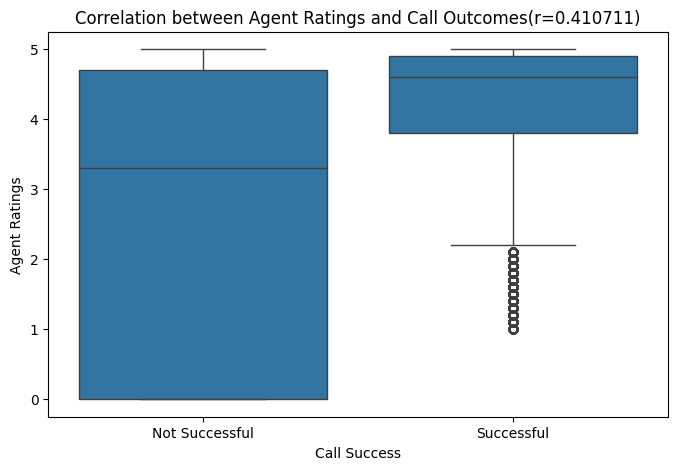

In [ ]:
# Creating Boxplot basis on this correlation

plt.figure(figsize=(8,5))
sns.boxplot(x='Call_Success',y='Agent_Rating',data=df)
plt.title(f"Correlation between Agent Ratings and Call Outcomes(r={correlation:2f})")
plt.xticks(ticks=[0,1],labels=['Not Successful','Successful'])
plt.xlabel('Call Success')
plt.ylabel('Agent Ratings')
plt.show()

## Insights and Observation from Agent Rating and Highest call Success

The boxplot visually confirms the positive correlation between agent ratings and call success. The median rating for successful calls is significantly higher than for unsuccessful calls, and the entire distribution of ratings for successful calls is shifted upwards. This indicates that higher-rated agents are more likely to achieve successful call outcomes.

## Summarization of the Analysis

This analysis of the call center data provides several key insights into agent performance and call outcomes.

**Top Performing Agents:**
- **Agent Ratings:** Ava Sandoval received the highest number of 5-star ratings, indicating strong customer satisfaction. However, Samuel Smith has the highest success rate.
- **Call Duration:** Michael Page has the longest average call duration, while Elijah Hawkins has the shortest. This could indicate that Michael is taking more time to resolve customer issues, or that he is less efficient.
- **Success Rates:** Samuel Smith has the highest success rate at 92.28%, while Drew Clay has the lowest at 20.15%. This is a significant difference and warrants further investigation.

**Correlation between Agent Ratings and Call Outcomes:**
- There is a positive correlation between agent ratings and call success. This suggests that agents who provide better customer service are more likely to achieve successful outcomes.

**Actionable Recommendations:**
- **Investigate Low-Performing Agents:** Further investigation is needed to understand why some agents, like Drew Clay, have such low success rates. This could be due to a lack of training, a difficult customer base, or other factors.
- **Share Best Practices:** High-performing agents, like Samuel Smith, should be encouraged to share their best practices with the rest of the team. This could include things like call scripts, objection handling techniques, and product knowledge.
- **Provide Additional Training:** All agents could benefit from additional training on topics like customer service, product knowledge, and sales techniques. This would help to improve the overall quality of service and increase the number of successful calls.
- **Incentivize High Performance:** The company should consider implementing an incentive program to reward agents for high performance. This could include bonuses, prizes, or other recognition. This would help to motivate agents and encourage them to provide the best possible service.